In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Chequing Balance")
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.plot(chequing_transactions['Account Balance'])
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Credit Balance")
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.plot(credit_transactions['Account Balance'])
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plt.title("savings Balance")
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.plot(savings_transactions['Account Balance'])
plt.show()

In [ ]:
january = pd.read_csv('Data/transactions.csv')
january.drop(columns='Unnamed: 0', inplace=True)
february = pd.read_csv('Data/feb_transactions.csv')
february.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
january['Date'] = pd.to_datetime(january['Date'])
february['Date'] = pd.to_datetime(february['Date'])

In [ ]:
two_months = [january, february]
two_months_df = pd.concat(two_months)

In [ ]:
two_months_df.sort_values(by=['Date'], inplace=True)
two_months_df = two_months_df.reset_index(drop=True)

In [ ]:
two_months_df

In [ ]:
two_months_df = two_months_df.set_index('Date')

In [ ]:
chequing_transactions = two_months_df[two_months_df['Account'] == 1]
credit_transactions = two_months_df[two_months_df['Account'] == 2]
savings_transactions = two_months_df[two_months_df['Account'] == 3]

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Chequing Balance")
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.plot(chequing_transactions['Account Balance'])
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Credit Balance")
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.plot(credit_transactions['Account Balance'])
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
plt.title("savings Balance")
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.plot(savings_transactions['Account Balance'])
plt.show()

In [ ]:
two_months_df.to_csv('Data/jan_feb_allaccounts.csv')

In [ ]:
all_accounts = pd.read_csv('Data/jan_feb_allaccounts.csv')

In [ ]:
all_accounts['Date'] = pd.to_datetime(all_accounts['Date'])

all_accounts.sort_values(by=['Date'], inplace=True)
all_accounts = all_accounts.reset_index(drop=True)

In [ ]:
all_accounts = all_accounts.set_index('Date')

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Net Balance")
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.plot(all_accounts['Total Money'])
plt.show()

In [ ]:
#Determine rolling statistics
credit_transactions["rolling_avg"] = credit_transactions["Account Balance"].rolling(window=100).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
credit_transactions["rolling_std"] = credit_transactions["Account Balance"].rolling(window=100).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(credit_transactions["Account Balance"], color='#379BDB', label='Original')
plt.plot(credit_transactions["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(credit_transactions["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
#Determine rolling statistics
credit_transactions["rolling_avg"] = credit_transactions["Account Balance"].rolling(window=30).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
credit_transactions["rolling_std"] = credit_transactions["Account Balance"].rolling(window=30).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(credit_transactions["Account Balance"], color='#379BDB', label='Original')
plt.plot(credit_transactions["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(credit_transactions["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
credit_transactions.info()

In [ ]:
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(credit_transactions['Account Balance'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

# Created Data

In [49]:
january = pd.read_csv('Data/January - Sheet1.csv')
january_credit = january[january['Account'] == 'credit']
january_chequing = january[january['Account'] == 'chequing']
january_credit.loc[:,'Date'] = pd.to_datetime(january_credit['Date'])
january_chequing.loc[:,'Date'] = pd.to_datetime(january_chequing['Date'])
january_credit = january_credit.set_index(['Date'])
january_chequing = january_chequing.set_index(['Date'])
january_chequing.dropna(inplace=True)
january_credit.dropna(inplace=True)

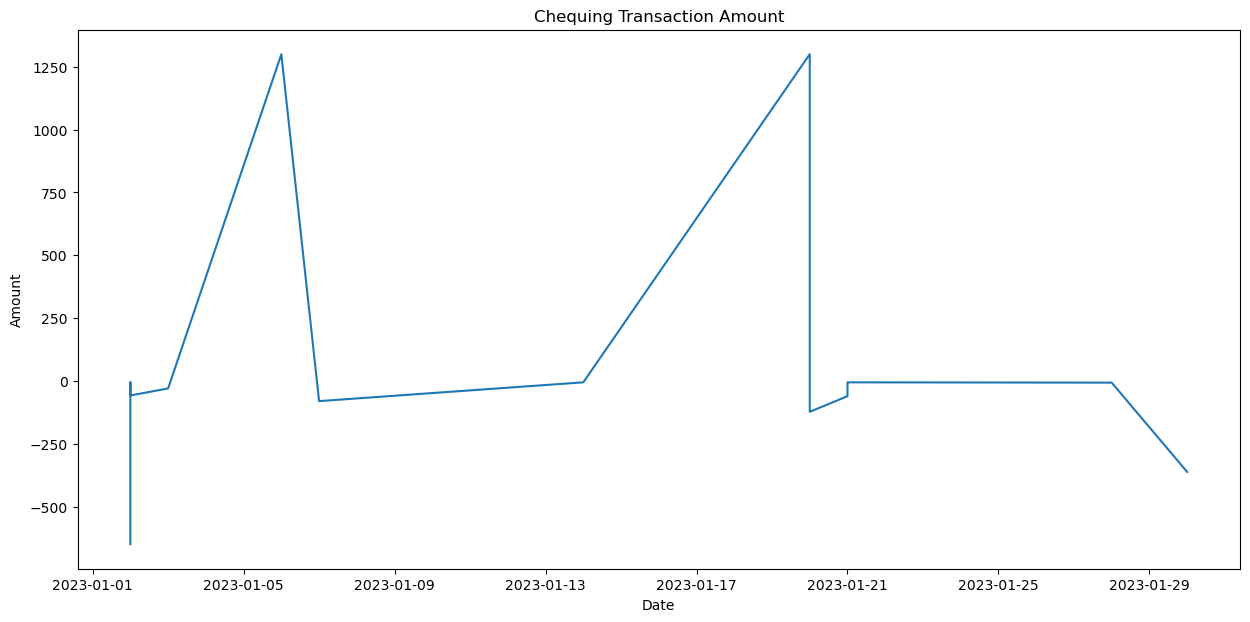

In [55]:
plt.figure(figsize=(15,7))
plt.title("Chequing Transaction Amount")
plt.xlabel('Date')
plt.ylabel('Amount')
plt.plot(january_chequing['Amount'])
plt.show()

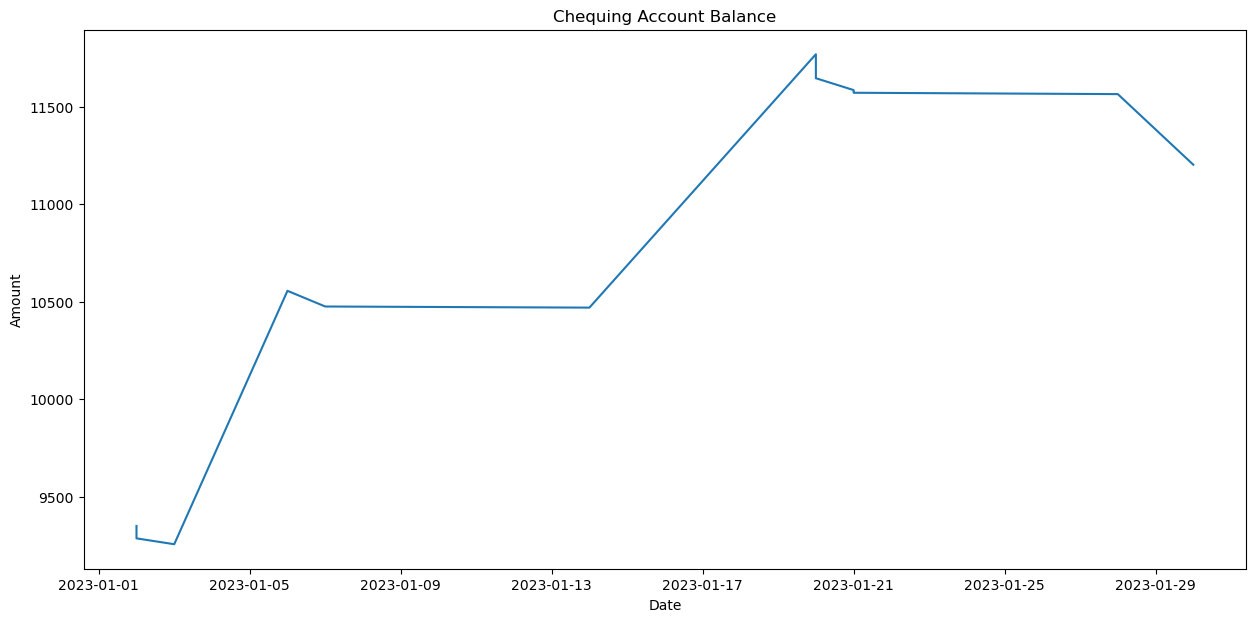

In [56]:
plt.figure(figsize=(15,7))
plt.title("Chequing Account Balance")
plt.xlabel('Date')
plt.ylabel('Amount')
plt.plot(january_chequing['Balance'])
plt.show()

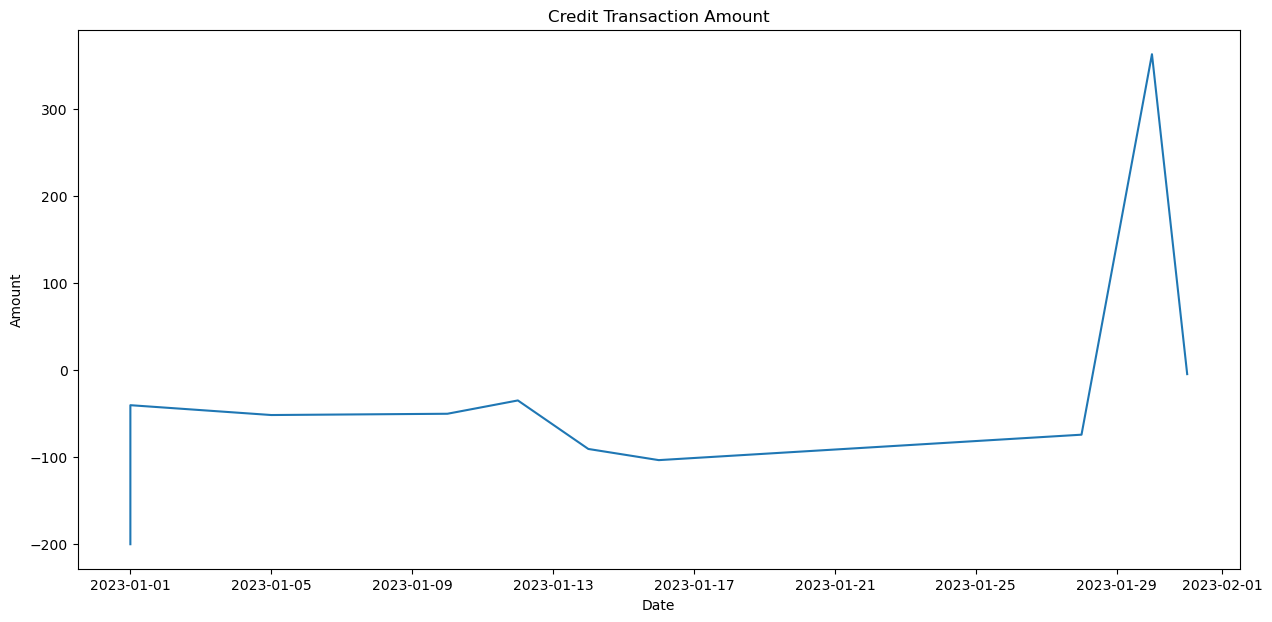

In [57]:
plt.figure(figsize=(15,7))
plt.title("Credit Transaction Amount")
plt.xlabel('Date')
plt.ylabel('Amount')
plt.plot(january_credit['Amount'])
plt.show()

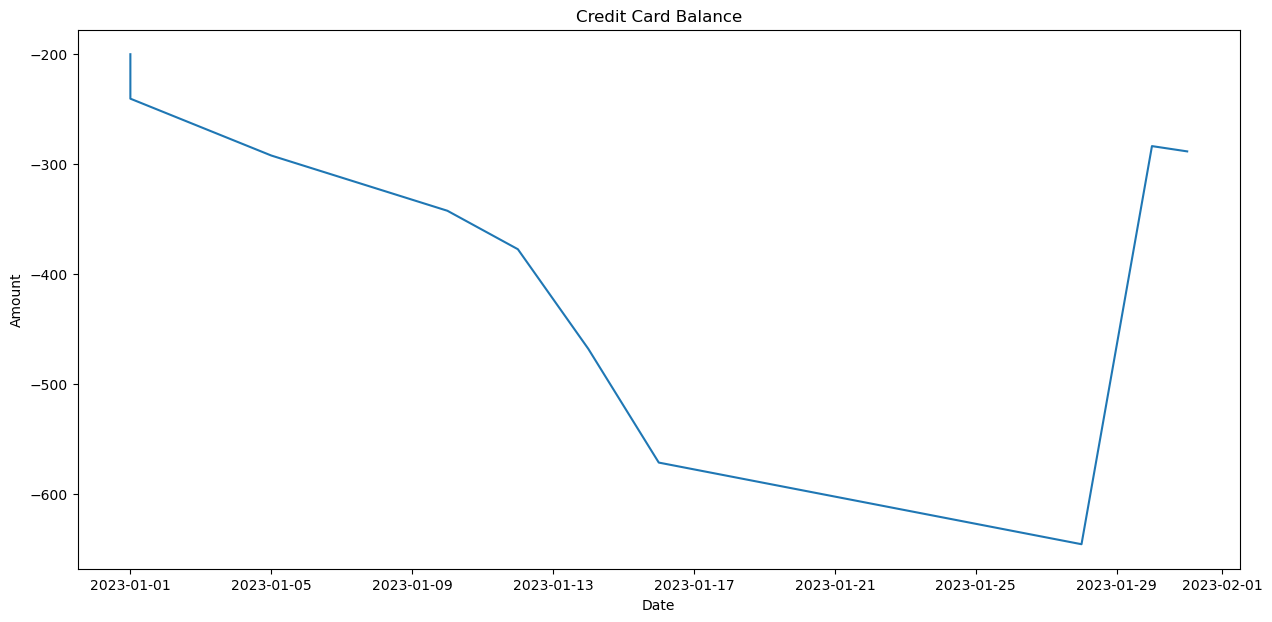

In [58]:
plt.figure(figsize=(15,7))
plt.title("Credit Card Balance")
plt.xlabel('Date')
plt.ylabel('Amount')
plt.plot(january_credit['Balance'])
plt.show()

## Q1

In [109]:
Quarter1 = pd.read_csv('Data/2023 Transactions - Q1.csv')
Quarter1_credit = Quarter1[Quarter1['Account'] == 'credit']
Quarter1_chequing = Quarter1[Quarter1['Account'] == 'chequing']
Quarter1_credit.loc[:,'Date'] = pd.to_datetime(Quarter1_credit['Date'])
Quarter1_chequing.loc[:,'Date'] = pd.to_datetime(Quarter1_chequing['Date'])
Quarter1_credit = Quarter1_credit.set_index(['Date'])
Quarter1_chequing = Quarter1_chequing.set_index(['Date'])
Quarter1_chequing.dropna(inplace=True)
Quarter1_credit.dropna(inplace=True)

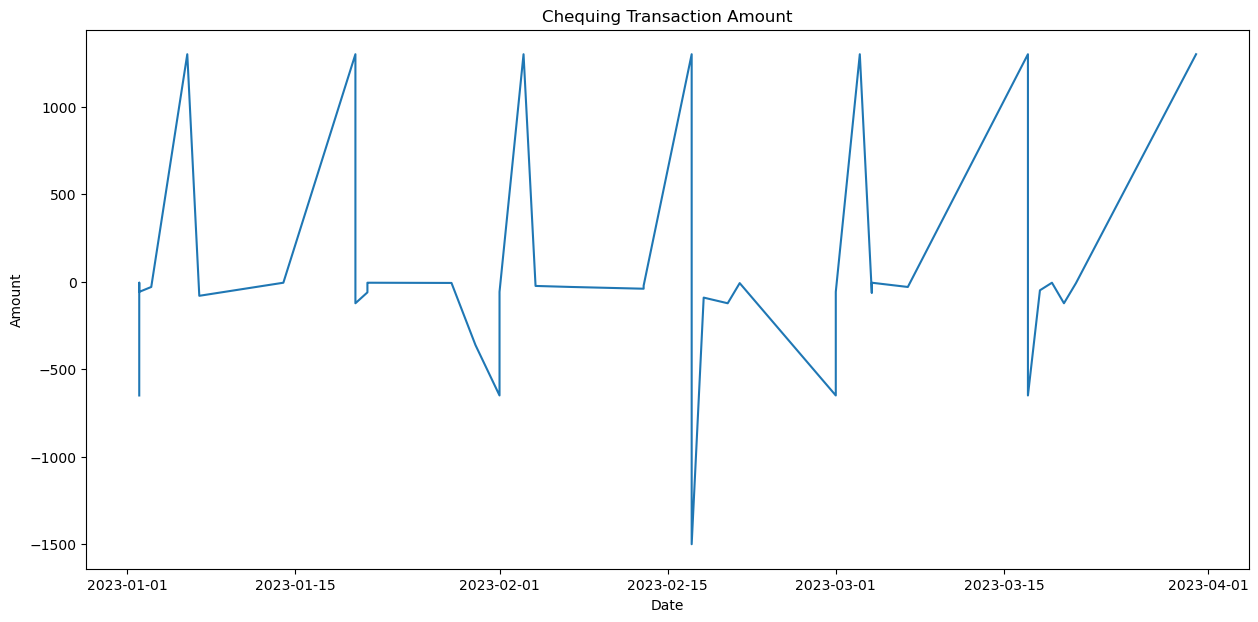

In [95]:
plt.figure(figsize=(15,7))
plt.title("Chequing Transaction Amount")
plt.xlabel('Date')
plt.ylabel('Amount')
plt.plot(Quarter1_chequing['Amount'])
plt.show()

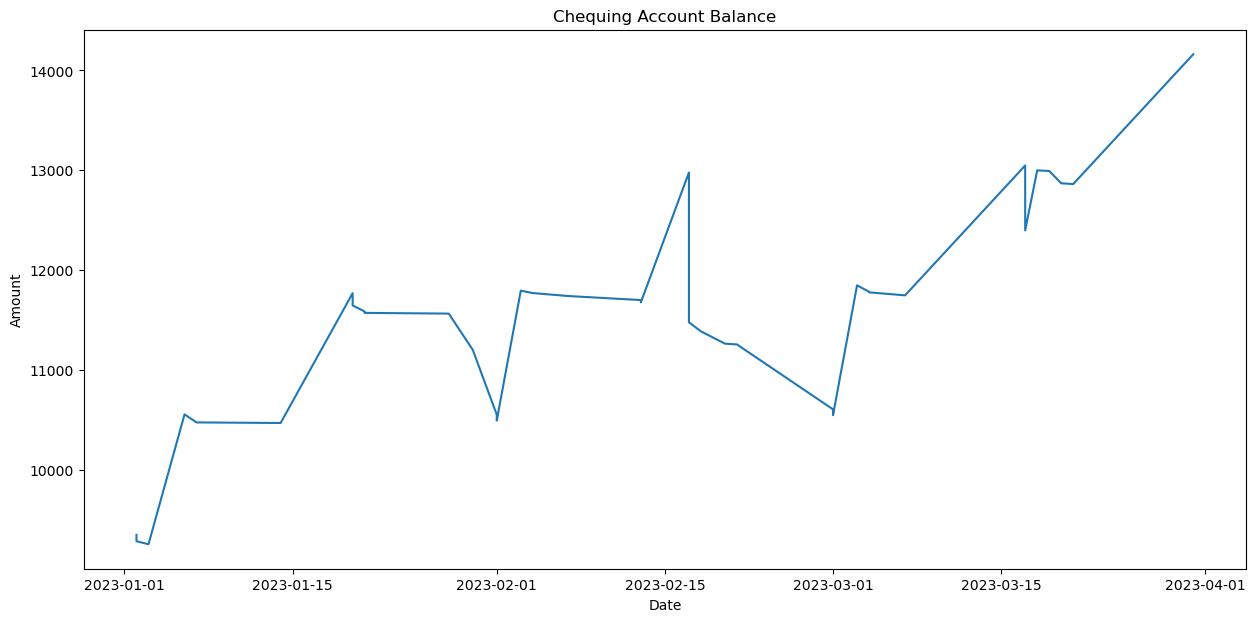

In [96]:
plt.figure(figsize=(15,7))
plt.title("Chequing Account Balance")
plt.xlabel('Date')
plt.ylabel('Amount')
plt.plot(Quarter1_chequing['Balance'])
plt.show()

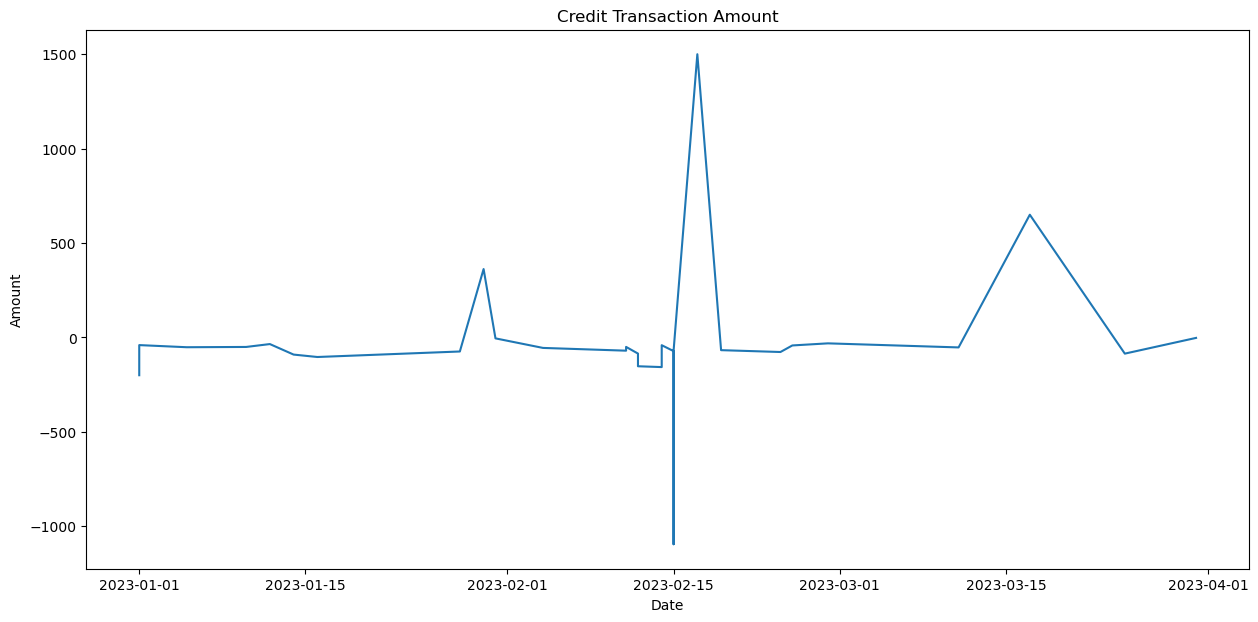

In [97]:
plt.figure(figsize=(15,7))
plt.title("Credit Transaction Amount")
plt.xlabel('Date')
plt.ylabel('Amount')
plt.plot(Quarter1_credit['Amount'])
plt.show()

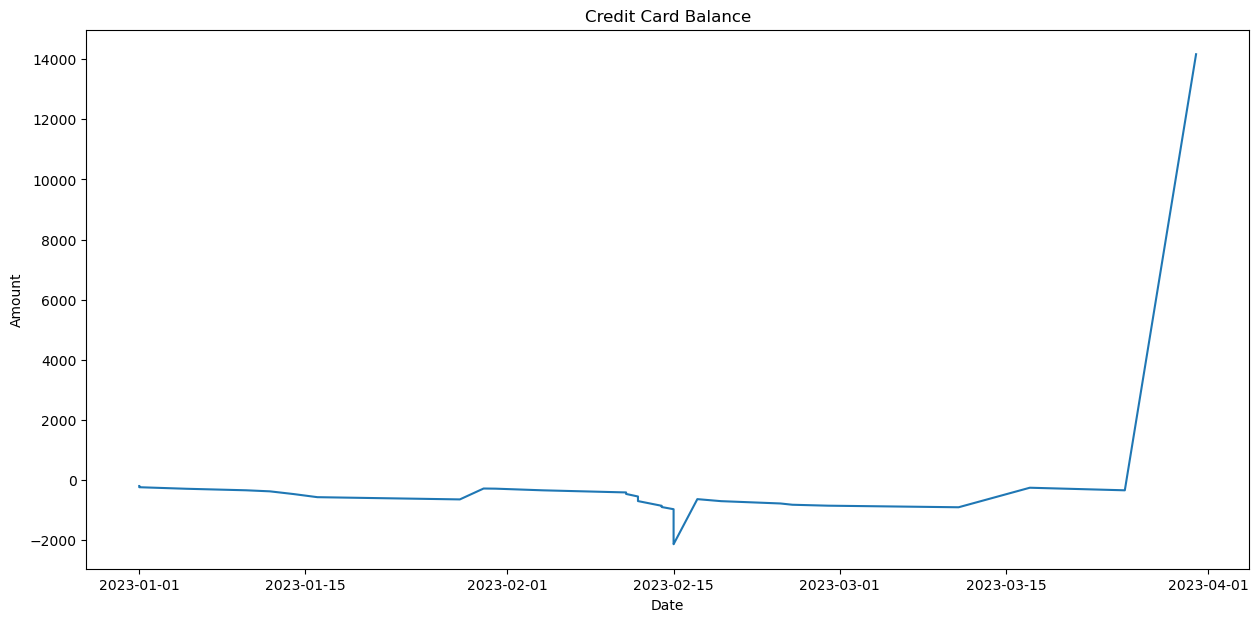

In [98]:
plt.figure(figsize=(15,7))
plt.title("Credit Card Balance")
plt.xlabel('Date')
plt.ylabel('Amount')
plt.plot(Quarter1_credit['Balance'])
plt.show()

In [115]:
quarter1_net = pd.read_csv('Data/2023 Transactions - Q1-net.csv')
quarter1_net.loc[:,'Date'] = pd.to_datetime(quarter1_net['Date'])
quarter1_net = quarter1_net.set_index(['Date'])
quarter1_net.dropna(inplace=True)

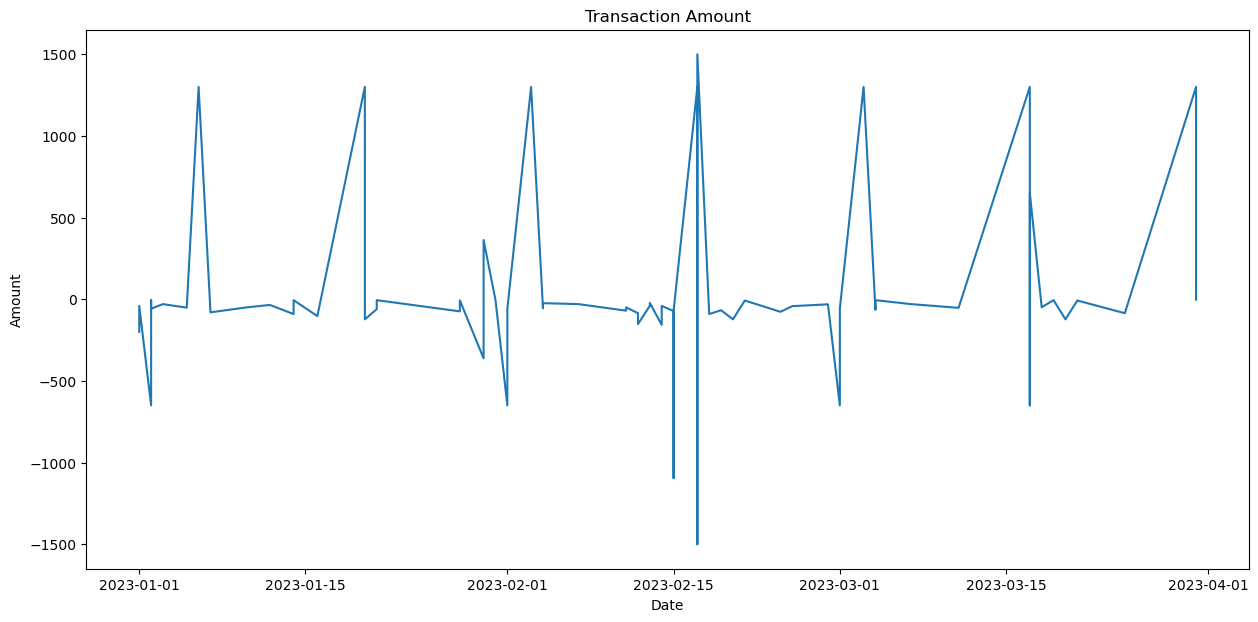

In [100]:
plt.figure(figsize=(15,7))
plt.title("Transaction Amount")
plt.xlabel('Date')
plt.ylabel('Amount')
plt.plot(quarter1_net['Amount'])
plt.show()

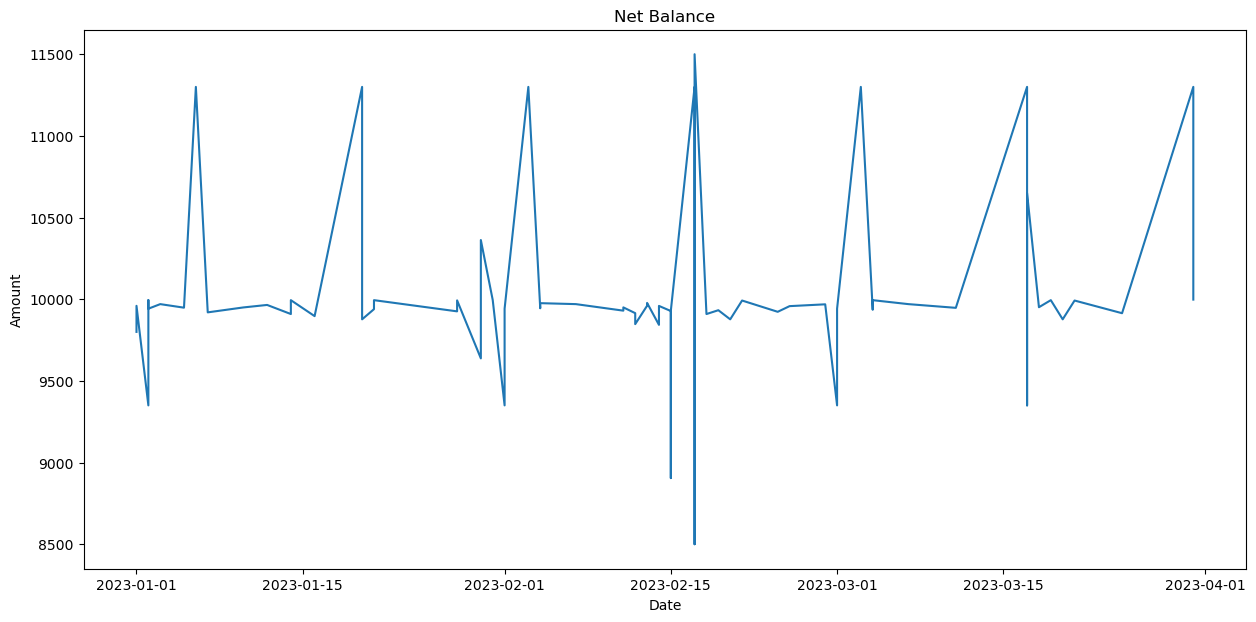

In [101]:
plt.figure(figsize=(15,7))
plt.title("Net Balance")
plt.xlabel('Date')
plt.ylabel('Amount')
plt.plot(quarter1_net['Balance'])
plt.show()

In [71]:
quarter1_net["rolling_avg"] = quarter1_net['Balance'].rolling(window=3).mean()
quarter1_net['rolling_std'] = quarter1_net['Balance'].rolling(window=3).std()

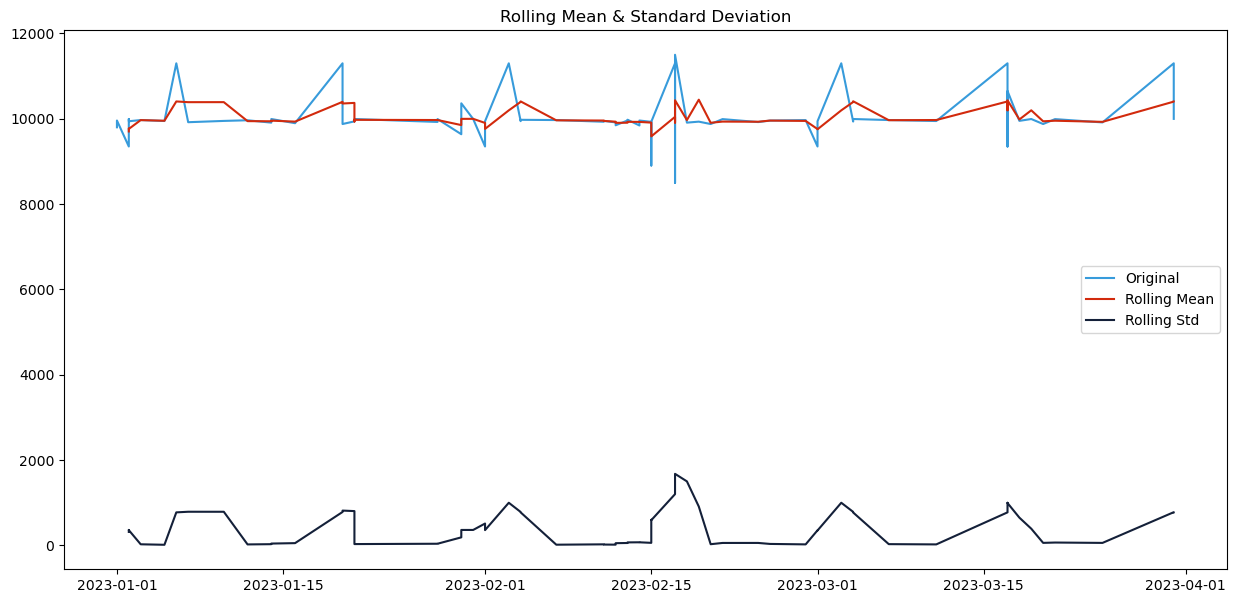

In [72]:
plt.figure(figsize=(15,7))
plt.plot(quarter1_net["Balance"], color='#379BDB', label='Original')
plt.plot(quarter1_net["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(quarter1_net["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [73]:
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(quarter1_net['Balance'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -1.136669e+01
p-value                        9.189524e-21
#Lags Used                     0.000000e+00
Number of Observations Used    6.700000e+01
Critical Value (1%)           -3.531955e+00
Critical Value (5%)           -2.905755e+00
Critical Value (10%)          -2.590357e+00
dtype: float64


In [74]:
#Standard ARIMA Model
ARIMA_model = pm.auto_arima(quarter1_net['Balance'],
                            start_p=1,
                            start_q=1,
                            test='adf', # use adftest to find optimal 'd'
                            max_p=3, max_q=3, # maximum p and q
                            m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                            d=None,# let model determine 'd'
                            seasonal=False, # No Seasonality for standard ARIMA
                            trace=False, #logs 
                            error_action='warn', #shows errors ('ignore' silences these)
                            suppress_warnings=True,
                            stepwise=True)

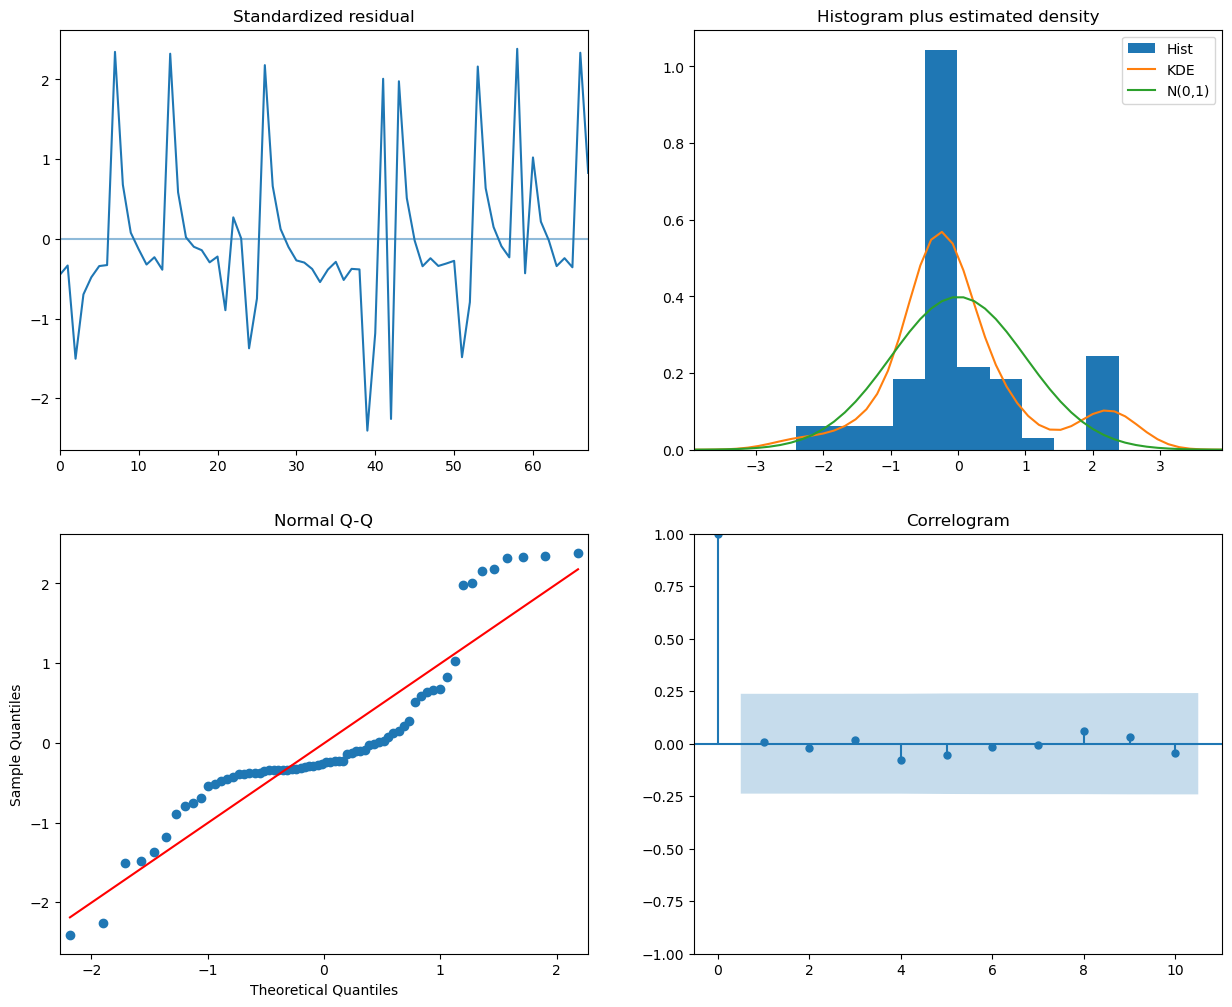

In [75]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


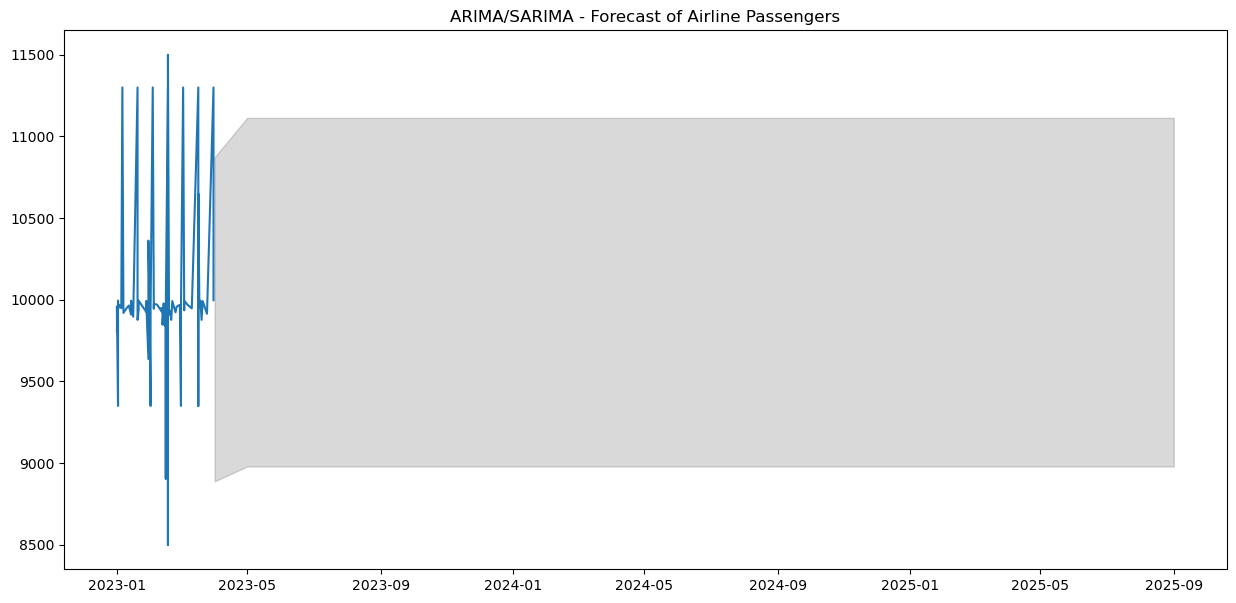

In [81]:
def forecast(ARIMA_model, periods=30):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(quarter1_net.index[-1] + pd.DateOffset(days=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(quarter1_net["Balance"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index,
                     lower_series,
                     upper_series,
                     color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Airline Passengers")
    plt.show()

forecast(ARIMA_model)

In [77]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(quarter1_net["Balance"], start_p=1, start_q=1,
                             test='adf',
                             max_p=3, max_q=3,
                             m=12, #12 is the frequncy of the cycle
                             start_P=0,
                             seasonal=True, #set to seasonal
                             d=None,
                             D=1, #order of the seasonal differencing
                             trace=False,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

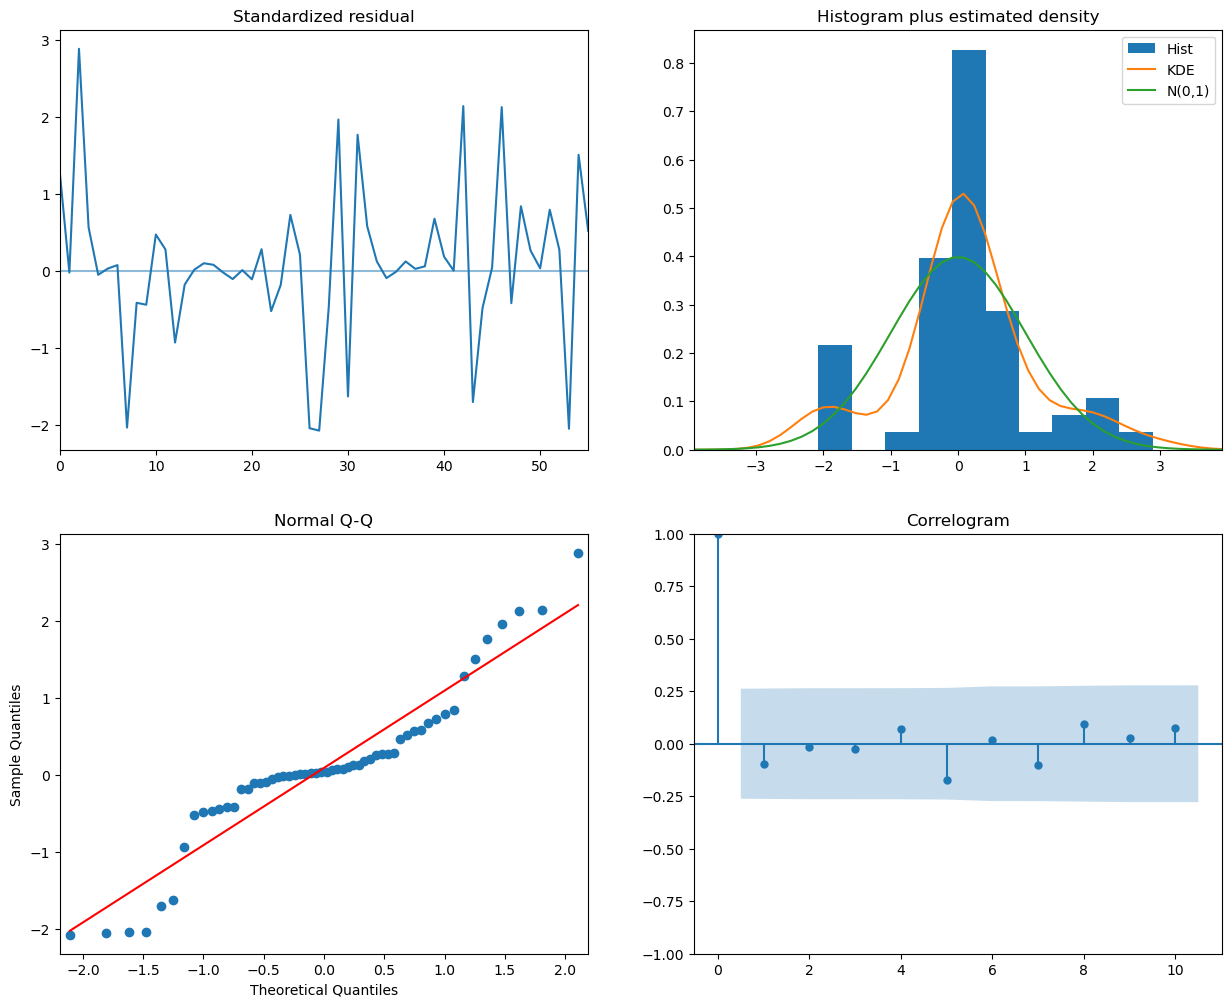

In [78]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


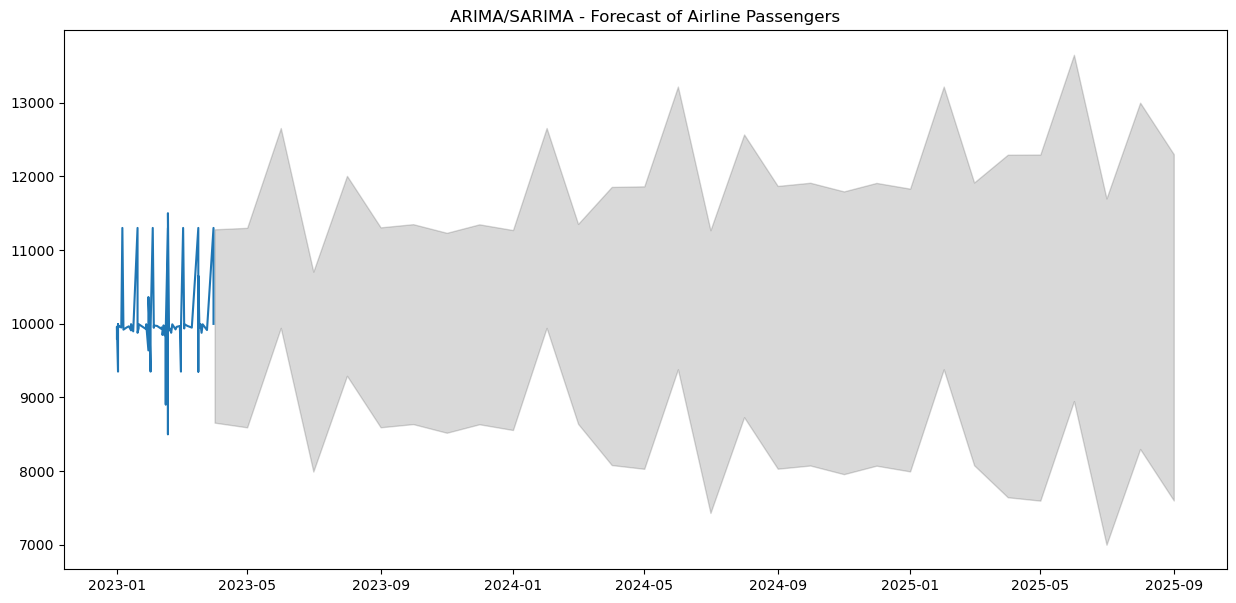

In [82]:
forecast(SARIMA_model)

In [110]:
print(f"Total transactions: {len(quarter1_net)}")
print(quarter1_net.head())

Total transactions: 68
                 Category Sub-category  Amount   Account  Balance
Date                                                             
2023-01-01  Food & Drinks       Drinks -200.00    credit  9800.00
2023-01-01  Food & Drinks     Take-out  -40.45    credit  9959.55
2023-01-02        Housing         Rent -650.00  chequing  9350.00
2023-01-02  Food & Drinks       Coffee   -5.74  chequing  9994.26
2023-01-02      Utilities        Phone  -58.04  chequing  9941.96


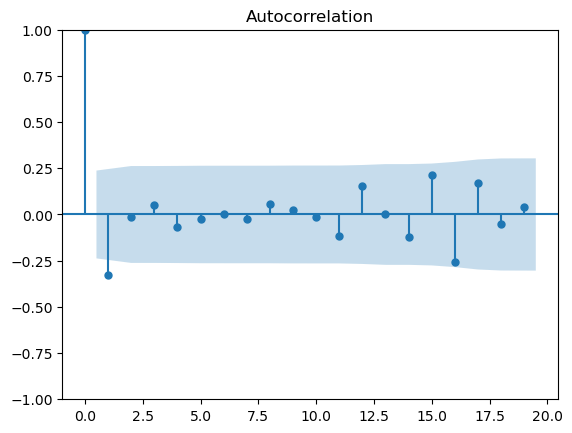

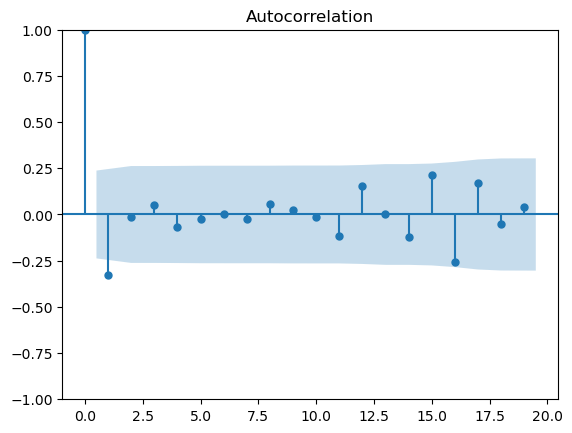

In [116]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(quarter1_net.Balance)

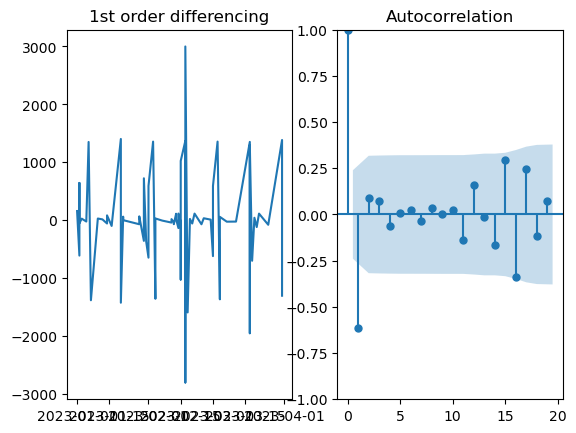

In [117]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("1st order differencing")
ax1.plot(quarter1_net.Balance.diff())

ax2 = f.add_subplot(122)
plot_acf(quarter1_net.Balance.diff().dropna(), ax=ax2)
plt.show()

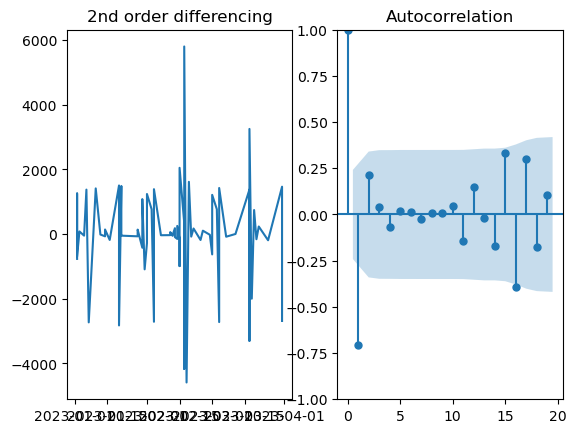

In [118]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title("2nd order differencing")
ax1.plot(quarter1_net.Balance.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(quarter1_net.Balance.diff().diff().dropna(), ax=ax2)
plt.show()

In [123]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(quarter1_net.Balance.dropna())
print('p-value: ', result[1])

result = adfuller(quarter1_net.Balance.diff().dropna())
print('p-value: ', result[1])

result = adfuller(quarter1_net.Balance.diff().diff().dropna())
print('p-value: ', result[1])

p-value:  9.18952379973097e-21
p-value:  1.0722282335064209e-07
p-value:  7.026019957121335e-08


In [125]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(quarter1_net.Balance, order=(1, 1, 2))
model_fit = model.fit()

C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\peter\miniconda3\envs\Ledgr\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [126]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Balance   No. Observations:                   68
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -527.110
Date:                Mon, 18 Mar 2024   AIC                           1062.219
Time:                        18:08:44   BIC                           1071.038
Sample:                             0   HQIC                          1065.709
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0557      0.518      0.108      0.914      -0.959       1.070
ma.L1         -1.1617      0.569     -2.043      0.041      -2.276      -0.047
ma.L2          0.2079      0.560      0.372      0.7

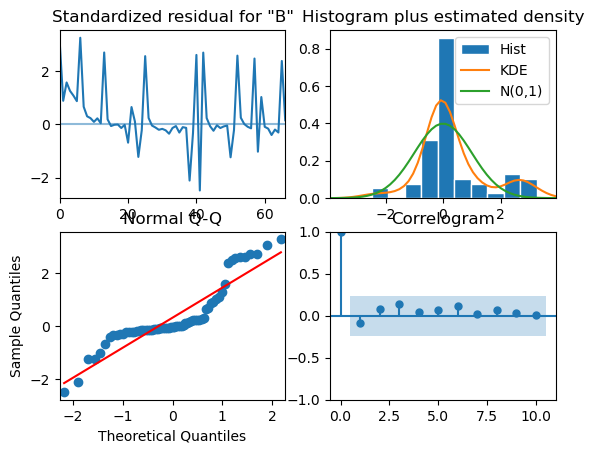

In [128]:
model_fit.plot_diagnostics()
plt.show()

In [129]:
forecast(model_fit)

ValueError: too many values to unpack (expected 2)